# July-P2 Batch Oasis Infobyte SIP

# Task 2 - Unemployment Analysis in India

#  Data and Packages Loading

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [29]:
unemployment_data_path = 'Unemployment_Rate_upto_11_2020.csv'
"""total unemployment"""
covid_data_path = 'Unemployment in India.csv' 
'''covid data'''

unemployment_df = pd.read_csv(unemployment_data_path)
covid_df = pd.read_csv(covid_data_path)

# Convert date columns to datetime objects
unemployment_df[' Date'] = pd.to_datetime(unemployment_df[' Date'])
covid_df[' Date'] = pd.to_datetime(covid_df[' Date'])

In [30]:
covid_df.duplicated().sum()


27

In [31]:
covid_df.drop_duplicates(inplace=True)

# Data Preprocessing

In [32]:
covid_df.isnull().sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [33]:
covid_df.dropna(inplace=True)


In [34]:
covid_df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

### Data Description


In [35]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Region                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [36]:
covid_df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [37]:
covid_df["Region"].unique()


array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [38]:
covid_df = covid_df.rename(columns={covid_df.columns[0]:'Region',covid_df.columns[3]:'Unemployment_rate',covid_df.columns[4]:'Employed', covid_df.columns[5]:'labour_participation_rate', covid_df.columns[6]:'area'})
covid_df.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural


In [39]:
covid_df.columns

Index(['Region', ' Date', ' Frequency', 'Unemployment_rate', 'Employed',
       'labour_participation_rate', 'area'],
      dtype='object')

In [40]:
unemployment_df = unemployment_df.rename(columns={unemployment_df.columns[0]:'Region',unemployment_df.columns[3]:'Unemployment_rate',unemployment_df.columns[4]:'Employed', unemployment_df.columns[5]:'labour_participation_rate', unemployment_df.columns[6]:'area'})
unemployment_df.head()

,Region,Date,Frequency,Unemployment_rate,Employed,labour_participation_rate,area,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


## Data Visualisation

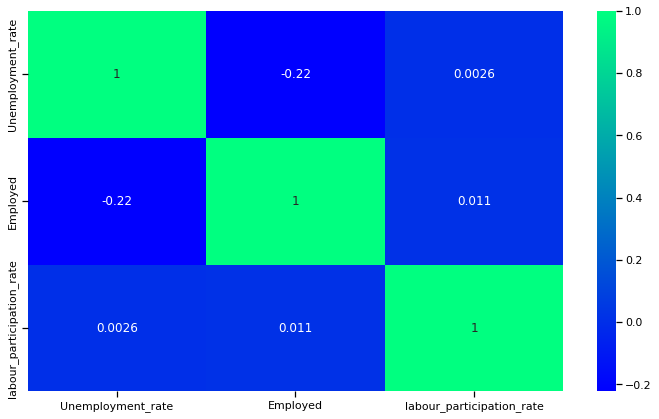

In [41]:
heat_maps = covid_df[['Unemployment_rate','Employed','labour_participation_rate']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='winter');

<AxesSubplot:>

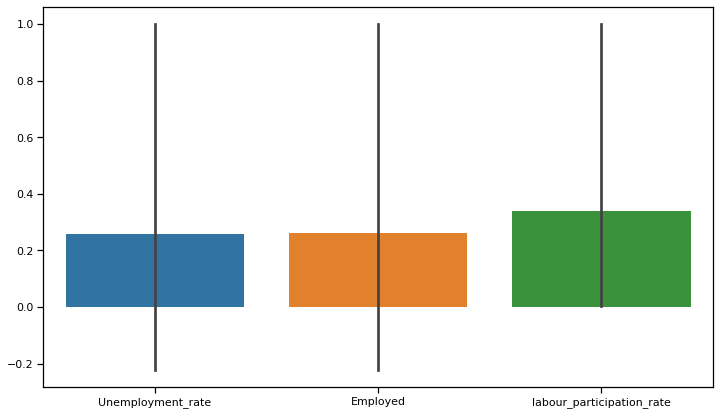

In [42]:
s=covid_df[['Unemployment_rate','Employed','labour_participation_rate']]
s=s.corr()
plt.figure(figsize=(12,7))
sns.set_context('notebook',font_scale=1)

sns.barplot(data= s )

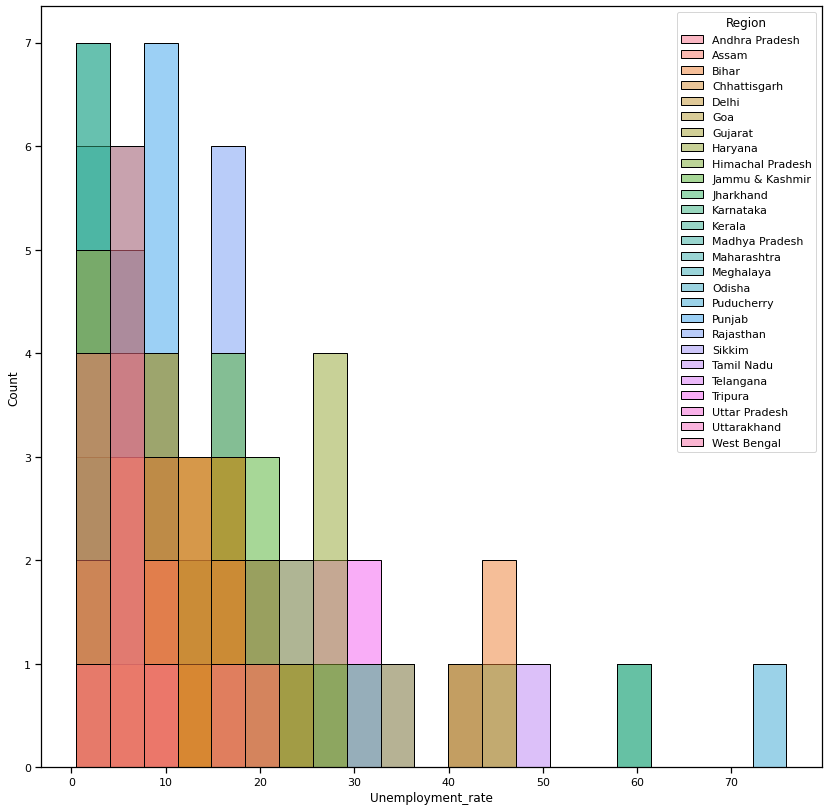

In [43]:
plt.figure(figsize=(14, 14))

sns.histplot(x='Unemployment_rate',
             hue='Region',
            data= unemployment_df)


plt.show()

In [44]:
reg = unemployment_df.groupby(["Region"])[['Unemployment_rate', "Employed", "labour_participation_rate"]].mean()
reg = pd.DataFrame(reg).reset_index()

fig = px.bar(reg, x="Region", y="Employed", color="Region", title="Avg Employed Rate / Region")
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()